In [409]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ra100 = pd.read_excel("raquetas_100.xlsx")
ra98 = pd.read_excel("raquetas_98.xlsx")
ra97 = pd.read_excel("raquetas_97.xlsx")
Babolat = pd.read_excel("Babolat.xlsx")
Yonex = pd.read_excel("Yonex.xlsx")
Head = pd.read_excel("Head.xlsx")
Wilson = pd.read_excel("Wilson.xlsx")

### Concatenar los 3 dataframes

In [410]:
df_racquet = pd.concat([ra100,ra98,ra97,
                        Babolat, Yonex, Head, Wilson], axis = 0)

In [411]:
df_racquet.head(10)

,Nombre,Head Size:,Length:,Strung Weight:,Balance:,Swing Weight:,Beam Width:,Tip/Shaft:,Composition:,Power Level:,Stiffness:,String Pattern:,Main Skip:,String Tension:
0,ProKennex Kinetic Pro 11g,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,10.20 oz / 289 g,1pts HH,324.0,0.0mm,24.0mm / 17.0mm,100% Ultra High Modulus Graphite with Kinetic ...,Low-Medium,66.0,16 Mains/19 Crosses,"7T,9T,7H,9H",52-68
1,Babolat Pure Control Team Plus Midplus,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.60 oz / 329 g,8pts HL,338.0,21.5mm,21.5mm / 21.5mm,Graphite / Kevlar,Low-Medium,64.0,16 Mains/20 Crosses,"8T,8H",50-66
2,Prince Turbo Shark Midplus,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.10 oz / 315 g,2pts HL,327.0,0.0mm,26.0mm / 22.0mm,GraphitExtreme / Titanium / Tungsten / Carbon,Medium,64.0,16 Mains/19 Crosses,"7T,9T,7H,9H",43-60
3,Babolat AeroPro Drive Plus,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.30 oz / 320 g,6pts HL,335.0,0.0mm,23.0mm / 26.0mm,High Modulus Graphite,Low-Medium,67.0,16 Mains/19 Crosses,"8T,8H",55-65
4,Babolat AeroPro Drive Plus Cortex,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.30 oz / 320 g,6pts HL,335.0,0.0mm,23.0mm / 26.0mm,High Modulus Graphite,Low-Medium,67.0,16 Mains/19 Crosses,"8T,8H",55-65
5,Prince O3 Speedport White,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.20 oz / 318 g,2pts HL,326.0,25.0mm,23.0mm / 22.0mm,High Modulus Graphite with Titanium and Tungsten,Low-Medium,64.0,16 Mains/19 Crosses,7T.9T.7H.9H,53-63
6,Yonex RQiS 2 Tour,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,10.80 oz / 306 g,4pts HL,326.0,28.0mm,21.0mm / 20.0mm,High Modulus Graphite / Elastic Titanium / CS ...,Low-Medium,67.0,16 Mains/18 Crosses,"8T, 8H",50-65
7,ProKennex Ki 10 PSE,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.50 oz / 326 g,3pts HL,330.0,0.0mm,24.5mm / 17.0mm,80% Ultra High Modulus Graphite/20% Kevlar wit...,Low-Medium,63.0,16 Mains/19 Crosses,"7T,9T,7H,9H",50-62
8,Prince O3 Hybrid Shark Midplus,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.10 oz / 315 g,2pts HL,324.0,26.0mm,22.0mm / 22.0mm,Dynamic Braided Graphite / Titanium / Tungsten,Medium,65.0,16 Mains/19 Crosses,7T.9T.7H.9H,53-63
9,Head Liquidmetal Instinct - 2003,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.20 oz / 318 g,4pts HL,329.0,25.0mm,23.0mm / 21.0mm,LiquidMetal Titanium / Graphite and Piezzo Ele...,Low-Medium,63.0,18 Mains/19 Crosses,"8T,10T,8H,10H",52-62


### Verificamos el tipo de dato de cada columna

In [412]:
print(df_racquet.dtypes)

Nombre              object
Head Size:          object
Length:             object
Strung Weight:      object
Balance:            object
Swing Weight:      float64
Beam Width:         object
Tip/Shaft:          object
Composition:        object
Power Level:        object
Stiffness:         float64
String Pattern:     object
Main Skip:          object
String Tension:     object
dtype: object


## Agrupación de raquetas según características

Queremos conocer cómo se agruparían las raquetas según algunas de sus características, incluyendo:

- **Head Size**: Superficie ovalada de la raqueta, medida en pulgadas cuadradas (in^2).
- **Length**: Longitud de la raqueta en centímetros (cm).
- **Strung Weight**: Peso estático de la raqueta con cuerdas, medido en gramos.
- **Swing Weight**: Sensación de peso al balancear la raqueta, medido en gramos.
- **Beam Width**: Ancho del marco de la raqueta.
- **Stiffness**: Rigidez de la raqueta, su resistencia a la deformación.

Utilizaremos estas características para realizar un análisis de agrupamiento y entender cómo las raquetas se relacionan entre sí en función de estas medidas.


In [413]:
print(df_racquet.columns)

Index(['Nombre', 'Head Size:', 'Length:', 'Strung Weight:', 'Balance:',
       'Swing Weight:', 'Beam Width:', 'Tip/Shaft:', 'Composition:',
       'Power Level:', 'Stiffness:', 'String Pattern:', 'Main Skip:',
       'String Tension:'],
      dtype='object')


In [414]:
# Eliminamos las columnas que no utilizaremos
df_racquet = df_racquet.drop(['Balance:', 'Tip/Shaft:', 'Composition:',
                            'Power Level:' , 'String Pattern:', 'Main Skip:',
                            'String Tension:'], axis = 1)

df_racquet.head()

,Nombre,Head Size:,Length:,Strung Weight:,Swing Weight:,Beam Width:,Stiffness:
0,ProKennex Kinetic Pro 11g,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,10.20 oz / 289 g,324.0,0.0mm,66.0
1,Babolat Pure Control Team Plus Midplus,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.60 oz / 329 g,338.0,21.5mm,64.0
2,Prince Turbo Shark Midplus,100 sq. in. / 645 sq. cm.,27.00 inches / 68.58 cm,11.10 oz / 315 g,327.0,0.0mm,64.0
3,Babolat AeroPro Drive Plus,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.30 oz / 320 g,335.0,0.0mm,67.0
4,Babolat AeroPro Drive Plus Cortex,100 sq. in. / 645 sq. cm.,27.50 inches / 69.85 cm,11.30 oz / 320 g,335.0,0.0mm,67.0


## Necesitamos limpiar y pasar la mayoria de los datos a valor númerico


In [415]:
# Extraer solo los números de la columna 'Head Size'
df_racquet['Head Size:'] = df_racquet['Head Size:'].str.extract(r'(\d+)').astype(float)
df_racquet['Length:'] = df_racquet['Length:'].str.extract(r'(\d+\.\d+) cm').astype(float)
df_racquet['Strung Weight:'] = df_racquet['Strung Weight:'].str.extract(r'(\d+) g').astype(float)
df_racquet['Beam Width:'] = df_racquet['Beam Width:'].str.extract(r'(\d+\.\d+)mm').astype(float)


df_racquet.head(10)

,Nombre,Head Size:,Length:,Strung Weight:,Swing Weight:,Beam Width:,Stiffness:
0,ProKennex Kinetic Pro 11g,100.0,69.85,289.0,324.0,0.0,66.0
1,Babolat Pure Control Team Plus Midplus,100.0,69.85,329.0,338.0,21.5,64.0
2,Prince Turbo Shark Midplus,100.0,68.58,315.0,327.0,0.0,64.0
3,Babolat AeroPro Drive Plus,100.0,69.85,320.0,335.0,0.0,67.0
4,Babolat AeroPro Drive Plus Cortex,100.0,69.85,320.0,335.0,0.0,67.0
5,Prince O3 Speedport White,100.0,68.58,318.0,326.0,25.0,64.0
6,Yonex RQiS 2 Tour,100.0,69.85,306.0,326.0,28.0,67.0
7,ProKennex Ki 10 PSE,100.0,68.58,326.0,330.0,0.0,63.0
8,Prince O3 Hybrid Shark Midplus,100.0,68.58,315.0,324.0,26.0,65.0
9,Head Liquidmetal Instinct - 2003,100.0,68.58,318.0,329.0,25.0,63.0


In [416]:
print(df_racquet.dtypes)

Nombre             object
Head Size:        float64
Length:           float64
Strung Weight:    float64
Swing Weight:     float64
Beam Width:       float64
Stiffness:        float64
dtype: object


In [417]:
valores_nan = df_racquet.isna()
conteo_nan_por_columna  = valores_nan.sum()
total_nan = valores_nan.sum().sum()

print("Valores NaN por columna:")
print(conteo_nan_por_columna)
print("\nTotal de valores NaN en el DataFrame:", total_nan)

Valores NaN por columna:
Nombre            0
Head Size:        0
Length:           0
Strung Weight:    0
Swing Weight:     1
Beam Width:       1
Stiffness:        1
dtype: int64

Total de valores NaN en el DataFrame: 3


In [418]:
# Son pocos valores, por lo que los dropeamos
df_racquet = df_racquet.dropna()

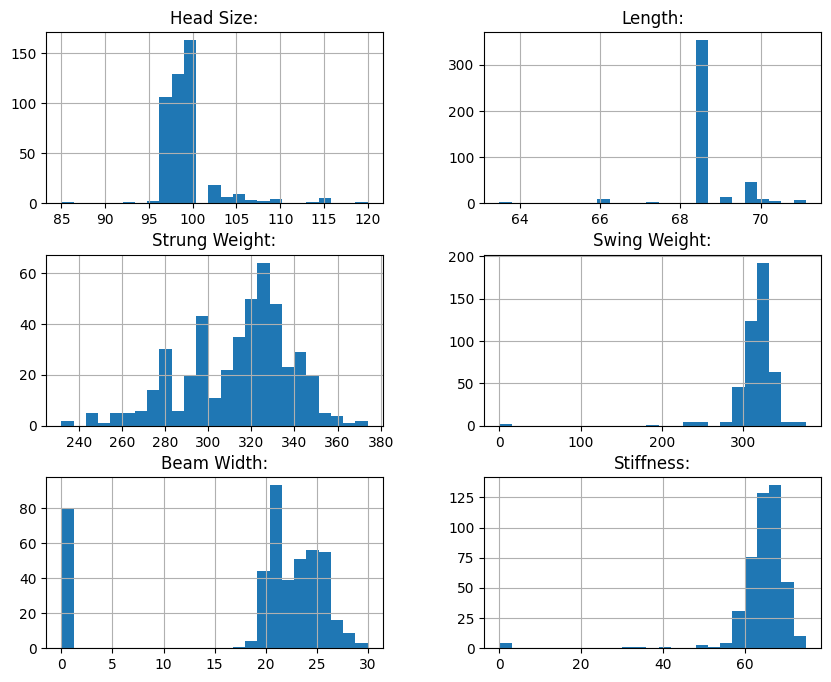

In [419]:
df_racquet.hist(bins= 25)
plt.gcf().set_size_inches(10, 8)
plt.show()

## Cosas importantes

- La mayoria tiene un head size entre 95 y 100
- El largo en general es de 68.85 cm
- El Strung Weight se concentra alrededor de 325 gramos
- El Swing Weight toma valores entre 300 y 330 gramos
- El Beam Width va entre 20 mm a 30 mm
- El Stiffness es entre 60 y 70

Hay que observar tambien que Swing Weight, Beam Width y Stiffness, toman valores 0, lo cual es imposible

In [420]:
df_racquet = df_racquet[df_racquet["Swing Weight:"] != 0]
df_racquet = df_racquet[df_racquet["Beam Width:"] != 0]
df_racquet = df_racquet[df_racquet["Stiffness:"] != 0]

### Aplicamos PCA para observar como se agrupan las raquetas de acuerdo a sus características

In [434]:
etiquetas = ['Head Size:', 'Length:', 'Strung Weight:', 'Swing Weight:', 'Beam Width:', 'Stiffness:']
X = df_racquet.loc[:,etiquetas]

In [435]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [436]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.44096459, 0.28771132])

In [437]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-1.318341,-1.622852
1,0.149322,-0.354598
2,1.049902,-2.207265
3,0.528928,-0.506522
4,0.027686,-0.327227
...,...,...
363,-1.143452,0.510804
364,-1.386724,0.565546
365,0.631201,0.022462
366,0.960965,0.707177


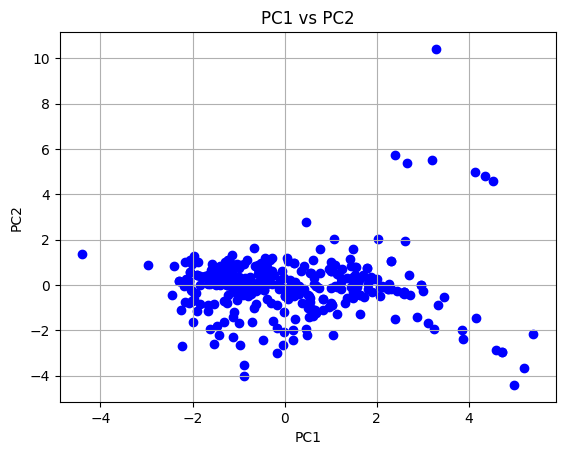

In [438]:
plt.figure()
plt.scatter(df_pca['PC1'], df_pca['PC2'], color = 'b')
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## Agrupamos usando K-means
- Primero un metodo para encontrar los clusters óptimos

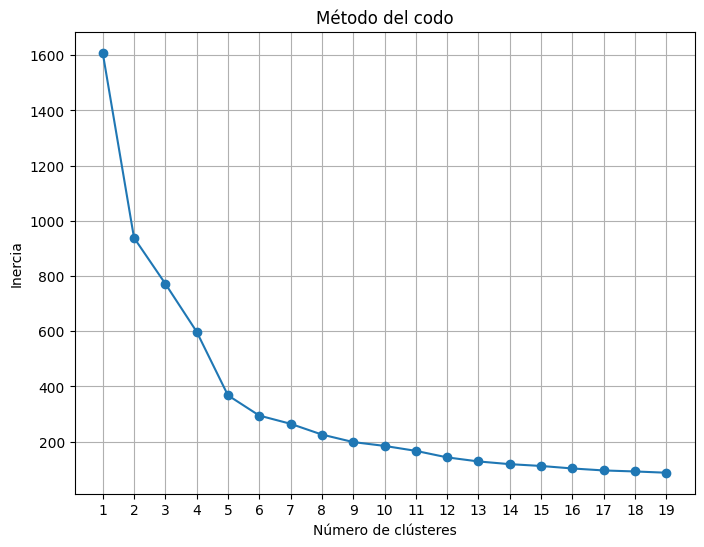

In [439]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")


inercia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inercia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

## Nos quedamos con 7 clusters

- Aplicamos k-means, y graficamos por colores de clusters 
- Graficamos los vectores de las 6 variables 

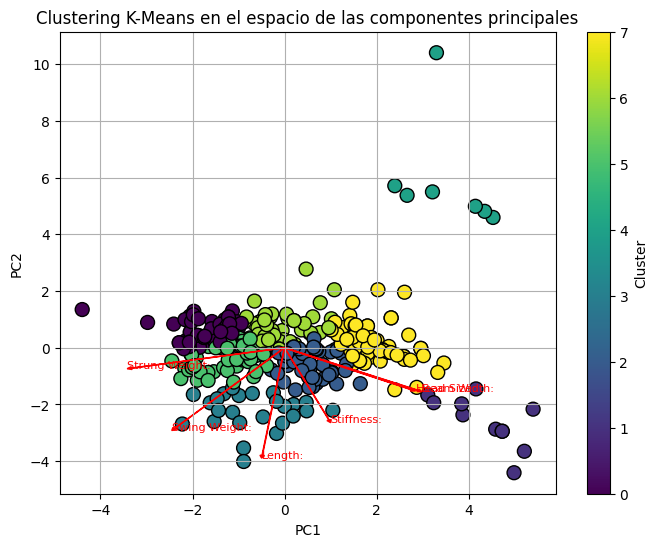

In [440]:
# Realizar el clustering con K-Means
kmeans = KMeans(n_clusters=8, random_state=42)  # Especifica el número de clústeres
clusters = kmeans.fit_predict(X_pca)

# Visualizar los resultados del clustering en el espacio de las componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=100)
plt.title('Clustering K-Means en el espacio de las componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Factor de escala para alargar los vectores
escala = 6

# Agregar las direcciones de las variables a la gráfica con vectores alargados
for i, var in enumerate(etiquetas[:6]):
    plt.arrow(0, 0, pca.components_[0, i]*escala, pca.components_[1, i]*escala, color='red',
              width=0.01, length_includes_head=True, head_width=0.1, head_length=0.1)
    plt.text(pca.components_[0, i]*escala, pca.components_[1, i]*escala, var, fontsize=8, color='red')

plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


## Algunas notas

- El grupo moderado concentra las raquetas de mayor peso (Strung Weight)
- El grupo 4 arriba a la derecha, corresponden a las raquetas "junior", de menor largo, y peso
- El grupo amarillo corresponde a las raquetas de Head Size superior a 100

Imprimimos en pantalla el nombre de las raquetas en sus clusters correspondientes

In [441]:
# Crear un DataFrame con los nombres de las raquetas y sus clusters asignados por K-Means
df_clusters = pd.DataFrame({'Raqueta': df_racquet["Nombre"], 'Cluster': clusters})

# Mostrar los nombres de las raquetas en cada cluster en una lista
for cluster_id in range(8):  # Cambia el rango según el número de clústeres
    raquetas_cluster = df_clusters[df_clusters['Cluster'] == cluster_id]['Raqueta'].tolist()
    print(f'Cluster {cluster_id}: {raquetas_cluster}')


Cluster 0: ['ProKennex Heritage Edition Type R', 'Prince Ozone Tour MP', 'Head Flexpoint Radical Tour - 2005', 'Wilson nBlade Midplus', 'Boris Becker 11', 'ProKennex Heritage Edition Type C 98', 'ProKennex Heritage Edition Type C Redondo Midplus', 'Head Liquidmetal Prestige Midplus - 2004', 'Head Microgel Prestige Midplus - 2008', 'Yonex MP-Tour 1 Midplus', 'Volkl C10 Pro', 'Volkl Tour 10 Midplus Generation II', 'Head Microgel Prestige Pro - 2008', 'Gamma Ipex 7.0 Midplus', 'Head Intelligence I.Prestige Midplus Standard - 2001', 'Head Ti.Fire Pro Edition', 'Volkl C-9 Pro', 'Volkl Tour 10 Midplus', 'Volkl Tour 10 V-Engine Midplus', "Dunlop M-Fil 200 Plus \\'06", 'Tecnifibre TFight 320 16x20', 'Tecnifibre Tfight 335 16x20', 'Tecnifibre TFight 320 18x20', 'Tecnifibre TFight 335 18x20', 'Head Pro Tour 280', 'Yonex VCORE Tour HG 330 (Wawrinka) - 2013', 'Yonex VCORE Tour G 310 - 2013', 'Wilson Pro Staff 97S', 'Wilson Pro Staff 97S', 'Yonex VCORE Duel G 97 (310g) - 2016', 'Wilson Ultra Tour -

In [442]:
# Filtrar los nombres de las raquetas que contienen las marcas específicas
raquetas_filtradas = df_clusters[df_clusters['Raqueta'].str.contains('Yonex')]

# Mostrar los nombres de las raquetas en cada cluster en una lista
for cluster_id in range(8):  # Cambia el rango según el número de clústeres
    raquetas_cluster = raquetas_filtradas[raquetas_filtradas['Cluster'] == cluster_id]['Raqueta'].tolist()
    print(f'Cluster {cluster_id}: {raquetas_cluster}')


Cluster 0: ['Yonex MP-Tour 1 Midplus', 'Yonex VCORE Tour HG 330 (Wawrinka) - 2013', 'Yonex VCORE Tour G 310 - 2013', 'Yonex VCORE Duel G 97 (310g) - 2016', 'Yonex VCORE Pro 97 (310) - 2017', 'Yonex VCORE Pro 97 (330) - 2017', 'Yonex VCORE PRO 97HD (18x20) - 2019', 'Yonex VCORE PRO 97 (330) - 2019', 'Yonex VCORE PRO 97 (310) - 2019', 'Yonex VCORE PRO 97D - 2021', 'Yonex VCORE PRO 97 - 2021', 'Yonex VCORE PRO 97H - 2021', 'Yonex Percept 97H - 2023', 'Yonex Percept 97D - 2023', 'Yonex Percept 97 - 2023', 'Yonex VCORE PRO 97D - 2021', 'Yonex VCORE PRO 97H - 2021', 'Yonex VCORE 95 - 2023', 'Yonex Percept 97H - 2023', 'Yonex Percept 97D - 2023', 'Yonex Percept 97 - 2023']
Cluster 1: ['Yonex EZONE 110 - 2022', 'Yonex Astrel 120 - 2024']
Cluster 2: ['Yonex EZONE 100 - 2022', 'Yonex EZONE 98L - 2022', 'Yonex VCORE 100 - 2023', 'Yonex VCORE 100L - 2023', 'Yonex Percept 100D - 2023', 'Yonex Percept 100 - 2023', 'Yonex EZONE 100 Aqua Night - 2024']
Cluster 3: ['Yonex RQiS 2 Tour', 'Yonex EZONE 98+

In [ ]:
df_racquet[df_racquet["Nombre"] == 'Wilson Shift 99 - 2023']

,Nombre,Head Size:,Length:,Strung Weight:,Balance:,Swing Weight:,Beam Width:,Tip/Shaft:,Composition:,Power Level:,Stiffness:,String Pattern:,Main Skip:,String Tension:
32,Wilson Shift 99 - 2023,99.0,68.58,318.0,6pts HL,317.0,23.5,23.5mm / 23.5mm,Graphite,Low-Medium,67.0,16 Mains/20 Crosses,"7T,9T,7H,9H",48-58
